# Validating NN Model

Using validation curves to validate the model performance 

In [1]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork

#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

Testing Model with Learning Rate 0.001 using Stochastic Gradient Descent

In [6]:
#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
lr = 0.001

##initialize NN 
nn_lr001_sgd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)

##train NN (example uses mini-batch)
losses = nn_lr001_sgd.train(training_images, training_labels, epochs = 10, batch_size=64)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1

##test NN
nn_lr001_sgd_cross_ent_error, nn_lr001_sgd_classification_error = nn_lr001_sgd.test(test_images, test_labels)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch number 0
number of batches 938


Epoch [1/10], Step [100/938], Loss: 199.99681738218567


Epoch [1/10], Step [200/938], Loss: 141.9159807315145


 22%|██▏       | 204/938 [00:08<00:30, 23.88it/s]


Epoch [1/10], Step [300/938], Loss: 110.58444644604891


 33%|███▎      | 305/938 [00:12<00:24, 26.22it/s]

Epoch [1/10], Step [400/938], Loss: 94.32389585462138


Epoch [1/10], Step [500/938], Loss: 83.47175507558073


Epoch [1/10], Step [600/938], Loss: 78.30371065883536


Epoch [1/10], Step [700/938], Loss: 71.05358793245465


Epoch [1/10], Step [800/938], Loss: 65.29297145561407


Epoch [1/10], Step [900/938], Loss: 61.04253257275441


 10%|█         | 1/10 [00:37<05:38, 37.61s/it]

epoch number 1
number of batches 938


Epoch [2/10], Step [100/938], Loss: 24.647604653913533


 11%|█         | 105/938 [00:04<00:34, 24.48it/s]

Epoch [2/10], Step [200/938], Loss: 18.005976889830634


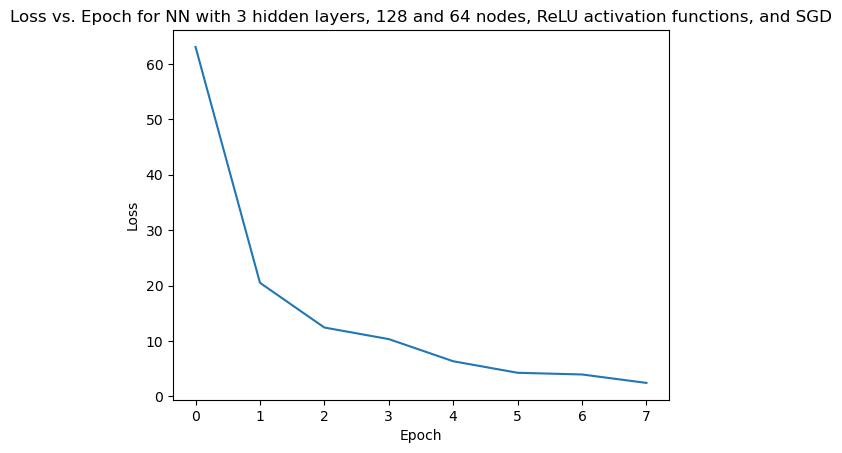

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.001 and using SGD')
plt.show()